In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [56]:
N = 20
#generate 20 random numbers between 0 & 1 , multiply by 10 so they range between 0 & 10, substract 5 so they range between -5 & +5
X = np.random.random(N)*10 - 5

# a line plus some random noise (Y to have a linear correlation with X)
Y = 0.5 * X - 1 + np.random.randn(N) 

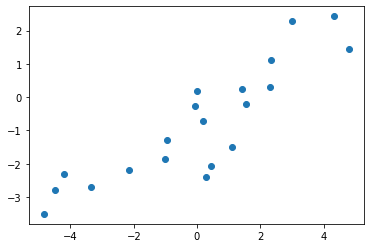

In [57]:
plt.scatter(X,Y);

In [58]:
# Create a model
# a linear model with 1 input and 1 output
model = nn.Linear(1,1)

In [59]:
# define the loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [60]:
# reshape the data into n_samples and n_dimensions 
X = X.reshape(N,1)
Y = Y.reshape(N,1)

In [61]:
type(X)

numpy.ndarray

In [62]:
# pytorch uses float32 by default, numpy creates float64
# so we will typecast
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

In [63]:
type(inputs)

torch.Tensor

In [64]:
# Train model
n_epochs = 100
losses = []
for it in range(n_epochs):
    # zero gradients 
    optimizer.zero_grad()

    # forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    # take the value from pytorch (tensor) to python list using the item () method
    # when the tensor is a single number that you want to extract
    losses.append(loss.item())

    #backward and optimize
    loss.backward()
    optimizer.step()

    print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item(): 4f}')


Epoch 1/100, Loss:  2.754676
Epoch 2/100, Loss:  1.626410
Epoch 3/100, Loss:  1.196185
Epoch 4/100, Loss:  0.983091
Epoch 5/100, Loss:  0.859982
Epoch 6/100, Loss:  0.784020
Epoch 7/100, Loss:  0.736005
Epoch 8/100, Loss:  0.705402
Epoch 9/100, Loss:  0.685843
Epoch 10/100, Loss:  0.673329
Epoch 11/100, Loss:  0.665322
Epoch 12/100, Loss:  0.660196
Epoch 13/100, Loss:  0.656916
Epoch 14/100, Loss:  0.654817
Epoch 15/100, Loss:  0.653473
Epoch 16/100, Loss:  0.652613
Epoch 17/100, Loss:  0.652062
Epoch 18/100, Loss:  0.651710
Epoch 19/100, Loss:  0.651484
Epoch 20/100, Loss:  0.651340
Epoch 21/100, Loss:  0.651248
Epoch 22/100, Loss:  0.651189
Epoch 23/100, Loss:  0.651151
Epoch 24/100, Loss:  0.651127
Epoch 25/100, Loss:  0.651111
Epoch 26/100, Loss:  0.651101
Epoch 27/100, Loss:  0.651095
Epoch 28/100, Loss:  0.651091
Epoch 29/100, Loss:  0.651088
Epoch 30/100, Loss:  0.651086
Epoch 31/100, Loss:  0.651085
Epoch 32/100, Loss:  0.651085
Epoch 33/100, Loss:  0.651084
Epoch 34/100, Loss:

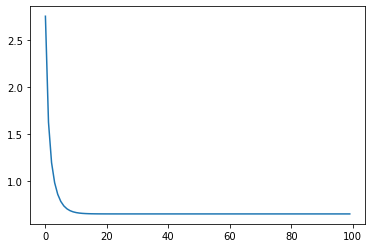

In [65]:
# plot the losses
plt.plot(losses);

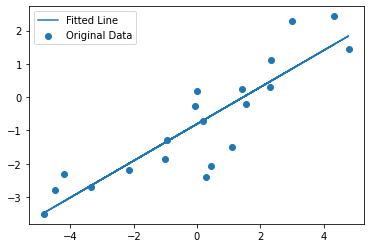

In [66]:
# plot predictions
predicted = model(inputs).detach().numpy() # use detach because of gradient object
plt.scatter(X,Y, label='Original Data')
plt.plot(X, predicted, label = 'Fitted Line')
plt.legend()
plt.show()

In [67]:
# Alternate method to make predictions without using detach()
with torch.no_grad():
    out=model(inputs).numpy()
out

array([[-3.2763774 ],
       [-0.8079916 ],
       [ 0.46216798],
       [-0.19073468],
       [ 0.85994875],
       [-0.02311057],
       [-2.6524477 ],
       [-1.3709215 ],
       [-0.64617956],
       [ 1.5873797 ],
       [ 0.04509693],
       [-0.56094325],
       [-1.9967356 ],
       [ 0.4813199 ],
       [ 1.8399215 ],
       [-3.4707246 ],
       [-0.70596856],
       [-3.1205838 ],
       [-1.3323613 ],
       [-0.84485453]], dtype=float32)

In [68]:
# verify if the weights and biases is close to the slope and itercept as we defiened earlier

W = model.weight.data.numpy()
B = model.bias.data.numpy()

print(W, B)

[[0.5521403]] [-0.803005]
